<a href="https://colab.research.google.com/github/1o-o1/Choke-size-prediction/blob/main/chokev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Google Drive Mount
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
 Accuracy.ipynb                                      ocr2.ipynb
 Accuracy.png                                        ocr.ipynb
 catdog/                                            'Predict Efficient.ipynb'
 Catdog1F1.png                                       RawData.ipynb
 Catdog1loss.png                                     Resultgen2.csv
 catdogmodel.h5                                      Resultgen3.csv
 catdogt1.ipynb                                      Resultgen.csv
'Copy of catdogt1.ipynb'                             Resultgen.gsheet
'Copy of image_classification_part1.ipynb'           results.csv
'Copy of Machine Learning Engineer | Sabbir.ipynb'   results_shaim.csv
 datachoke.csv                                      'selfcite (1).ipynb'
 datapreproc.ipynb                                   selfcite.ipynb
 F1Score.ipynb                                       Seq3CNN.ipynb
 F1Score.png                                  

In [ ]:
df=pd.read_csv('datachoke.csv')

In [ ]:
df.head()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,Condensate Rate,Water Rate
0,"2,175",47.0,1028.2,43.16,44.95,24.71
1,"2,171",47.0,1027.6,43.05,42.54,27.96
2,"2,169",47.0,1026.9,43.02,45.77,24.70
3,"2,167",47.0,1026.9,43.01,43.08,25.71
4,"2,166",47.0,1024.9,42.98,43.57,25.67


In [ ]:
df['Pressure U/S of Choke'] = df['Pressure U/S of Choke'].str.replace(',', '').astype(float)

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

Pressure U/S of Choke    0
Choke                    0
Pressure D/S of Choke    0
Gas Rate                 0
Condensate Rate          0
Water Rate               0
dtype: int64

In [ ]:

glr = df['Gas Rate']* 1e6 / ((df['Condensate Rate'] +  df['Water Rate'] )*5.61)

In [ ]:
df['glr']=glr

In [ ]:
df.head()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,Condensate Rate,Water Rate,glr
0,2175.0,47.0,1028.2,43.16,44.95,24.71,110442.214105
1,2171.0,47.0,1027.6,43.05,42.54,27.96,108848.181439
2,2169.0,47.0,1026.9,43.02,45.77,24.70,108818.634850
3,2167.0,47.0,1026.9,43.01,43.08,25.71,111450.307700
4,2166.0,47.0,1024.9,42.98,43.57,25.67,110648.744556


In [ ]:
df.describe()

,Pressure U/S of Choke,Choke,Pressure D/S of Choke,Gas Rate,Condensate Rate,Water Rate,glr
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,1828.591870,43.089431,1007.397724,42.214098,41.296764,23.442569,116438.487607
std,134.935964,12.669443,27.666515,3.156580,3.578191,3.393354,5679.231967
min,1647.000000,5.000000,917.000000,14.520000,14.360000,9.390000,96032.688850
25%,1726.000000,33.000000,984.500000,42.080000,39.870000,21.410000,112060.020752
50%,1817.000000,36.000000,1011.900000,42.420000,41.630000,23.270000,115931.639021
75%,1877.000000,60.000000,1031.800000,43.040000,43.080000,25.900000,119814.927243
max,2423.000000,64.000000,1080.600000,45.170000,49.740000,31.260000,133963.827188


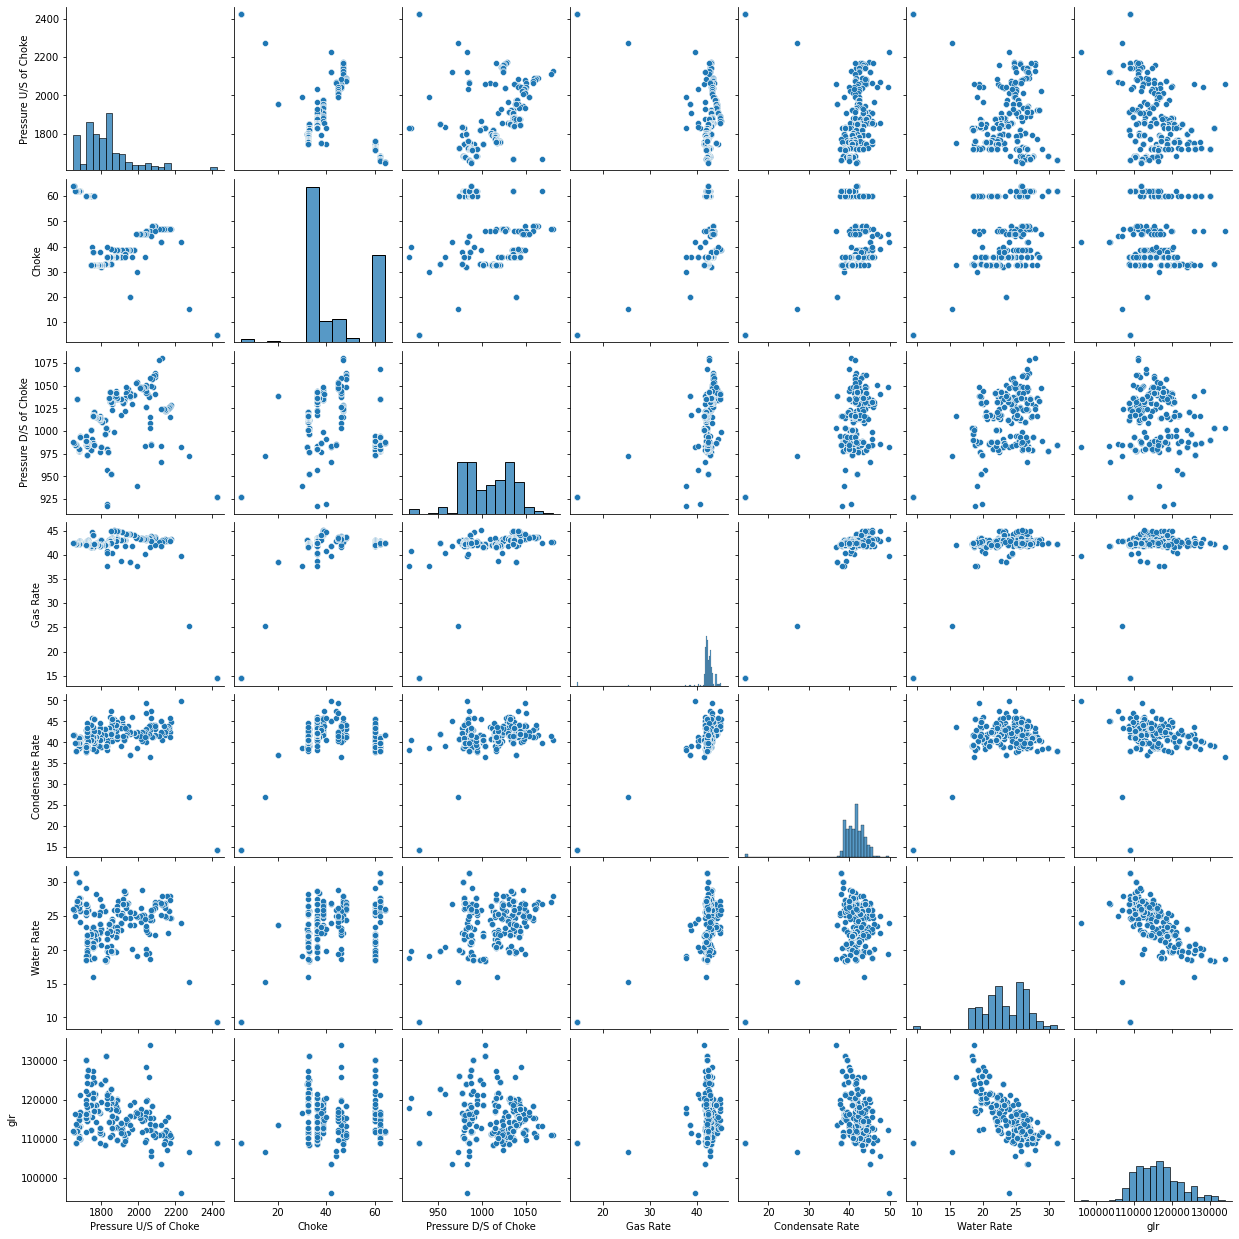

In [ ]:
sns.pairplot(df)

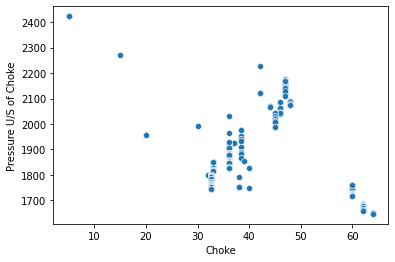

In [ ]:
#plt.figure(figsize=(10,10))

ax=sns.scatterplot(data=df, x="Choke", y="Pressure U/S of Choke")
#ax.set(xlim=(29,65))

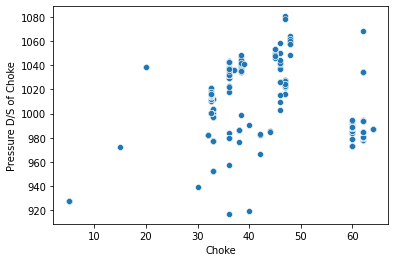

In [ ]:

ax=sns.scatterplot(data=df, x="Choke", y="Pressure D/S of Choke")

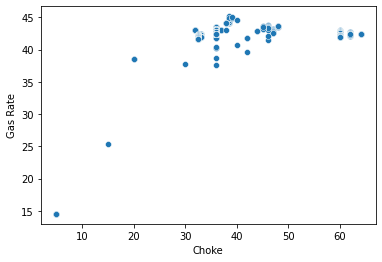

In [ ]:

ax=sns.scatterplot(data=df, x="Choke", y="Gas Rate")

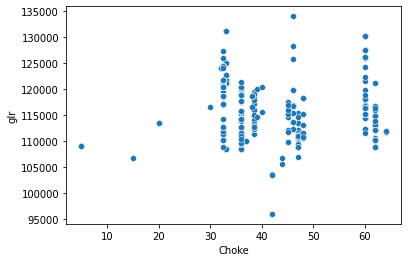

In [ ]:

ax=sns.scatterplot(data=df, x="Choke", y="glr")

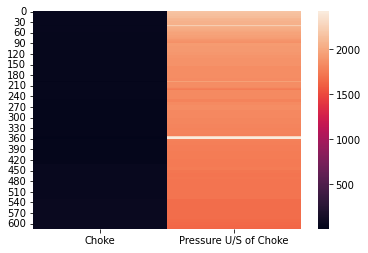

In [ ]:
tmp=df[['Choke','Pressure U/S of Choke']]
sns.heatmap(tmp)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0.5, 1.0, 'GLR')

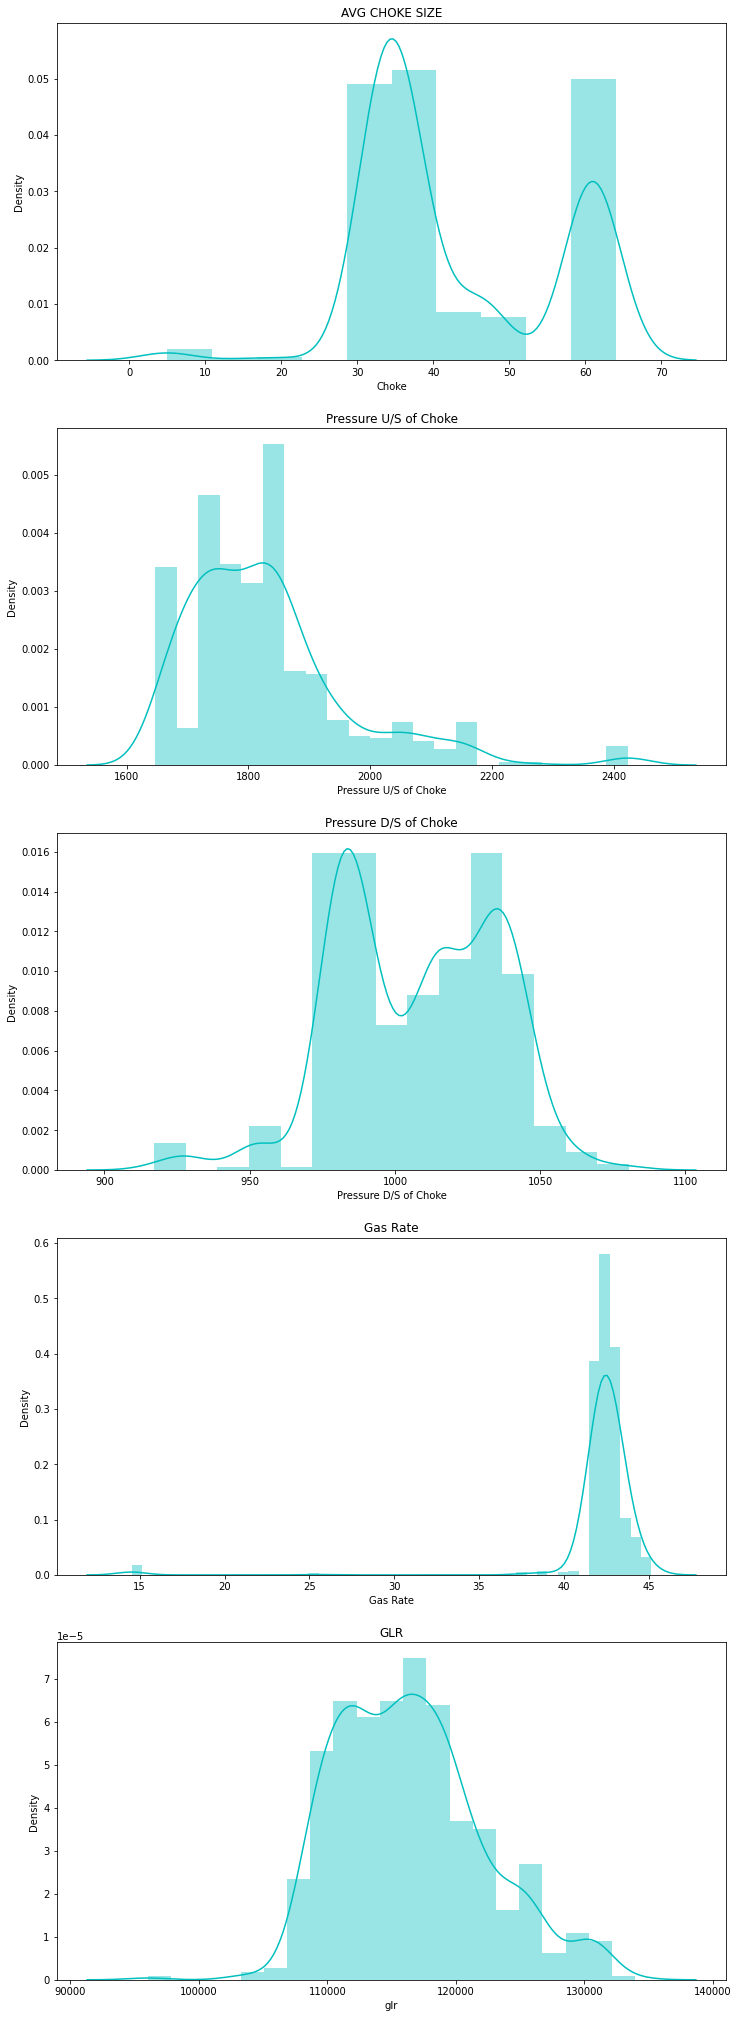

In [ ]:
f, ax = plt.subplots(5, figsize=(12,36))
sns.distplot(df['Choke'],color='c',ax=ax[0])
sns.distplot(df['Pressure U/S of Choke'],color='c',ax=ax[1])
sns.distplot(df['Pressure D/S of Choke'],color='c',ax=ax[2])
sns.distplot(df['Gas Rate'],color='c',ax=ax[3])
sns.distplot(df['glr'],color='c',ax=ax[4])
ax[0].set_title('AVG CHOKE SIZE')
ax[1].set_title('Pressure U/S of Choke')
ax[2].set_title('Pressure D/S of Choke')
ax[3].set_title('Gas Rate')
ax[4].set_title('GLR')

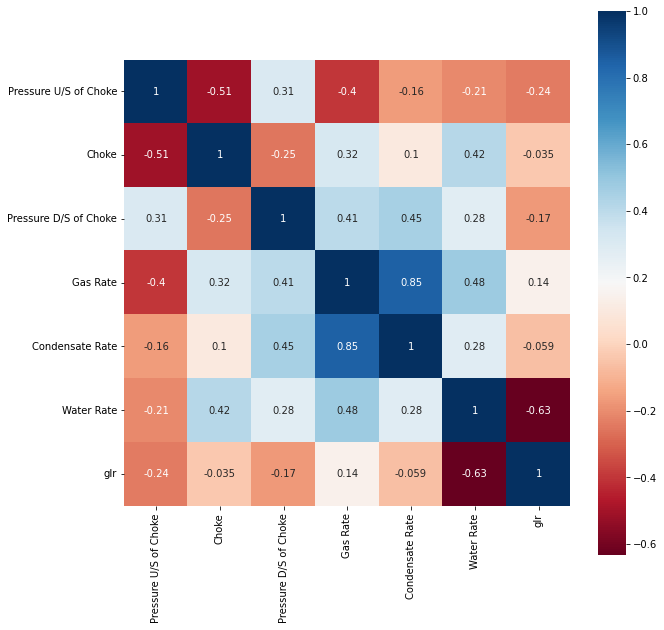

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='RdBu',square=True)

In [ ]:
x=df.drop('Choke', axis=1)
y=df['Choke']
print(x.shape)
print(y.shape)

(615, 6)
(615,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("train Size:" +str(y_train.shape))
print("test Size:" +str(y_test.shape))

train Size:(430,)
test Size:(185,)


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


,Coefficient
Pressure U/S of Choke,-2.662390
Pressure D/S of Choke,-4.344542
Gas Rate,-8.688572
Condensate Rate,7.138842
Water Rate,12.291005
glr,8.060659


In [ ]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print("Liner Regression")
print('---------------------------------')
print('Test set evaluation:\n__________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n__________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Liner Regression
---------------------------------
Test set evaluation:
__________________________________
MAE: 7.180438415212275
MSE: 74.3997847285732
RMSE: 8.625530982413384
R2 Square 0.5030839735296193
__________________________________
Train set evaluation:
__________________________________
MAE: 8.641730228896913
MSE: 97.37129608302848
RMSE: 9.867689500740711
R2 Square 0.40909842807011165
__________________________________


In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Random Sample Consensus")
print('----------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Robust Regression", *evaluate(y_test, test_pred) , cross_val(RANSACRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Sample Consensus
----------------------------
Test set evaluation:
_____________________________________
MAE: 9.68834639651
MSE: 253.86587132965914
RMSE: 15.933168904196652
R2 Square -0.6955696914688425
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.818503816486974
MSE: 251.2693174446111
RMSE: 15.851476822195814
R2 Square -0.5248378180071243
__________________________________


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Ridge Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Ridge Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 7.825530853905936
MSE: 79.72162528893959
RMSE: 8.928696729587113
R2 Square 0.46753941013586864
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.055290110720769
MSE: 100.16789672114027
RMSE: 10.00839131534835
R2 Square 0.39212714618729405
__________________________________


In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("LASSO Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(Lasso())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

LASSO Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 9.057164218915322
MSE: 105.18587474485007
RMSE: 10.256016514458723
R2 Square 0.2974637344757215
__________________________________
Train set evaluation:
_____________________________________
MAE: 9.778467477513017
MSE: 125.70065898267858
RMSE: 11.211630522929239
R2 Square 0.2371805657988586
__________________________________


In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("Elastic Net Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Elastic Net Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 7.263446061568632
MSE: 74.51662669538607
RMSE: 8.632301355686447
R2 Square 0.5023035862464376
__________________________________
Train set evaluation:
_____________________________________
MAE: 8.69335359718858
MSE: 97.6739286660347
RMSE: 9.883012125158741
R2 Square 0.4072618902380273
__________________________________


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)
print(" Polynomial Regression")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

 Polynomial Regression
---------------------------------
Test set evaluation:
_____________________________________
MAE: 3.4713758777618455
MSE: 21.203861999030917
RMSE: 4.604765140485551
R2 Square 0.8583794443918842
__________________________________
Train set evaluation:
_____________________________________
MAE: 3.7729193909209418
MSE: 23.2246627457783
RMSE: 4.819197313430765
R2 Square 0.8590602130599155
__________________________________


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
sgd_reg.fit(X_train, y_train)

test_pred = sgd_reg.predict(X_test)
train_pred = sgd_reg.predict(X_train)
print("Stochastic Gradient Descent")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Stochastic Gradient Descent", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)


Stochastic Gradient Descent
---------------------------------
Test set evaluation:
_____________________________________
MAE: 7.214105027705917
MSE: 75.29071185956029
RMSE: 8.677022061719118
R2 Square 0.4971334728471256
__________________________________
Train set evaluation:
_____________________________________
MAE: 8.723914784888853
MSE: 98.49093982916173
RMSE: 9.924260165330297
R2 Square 0.40230382559273004
__________________________________


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print("Random Forest Regressor")
print('---------------------------------')

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Random Forest Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 0.19143243243243246
MSE: 1.0882822972972976
RMSE: 1.0432076961455459
R2 Square 0.9927313645217667
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.1058372093023256
MSE: 0.3199098837209304
RMSE: 0.5656057670506289
R2 Square 0.9980586141833275
__________________________________


In [ ]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=500, epsilon=0.001)
svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
train_pred = svm_reg.predict(X_train)
print("Support Vector Machine Regressor")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["SVM Regressor", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Support Vector Machine Regressor
---------------------------------
Test set evaluation:
_____________________________________
MAE: 0.7722010440151325
MSE: 5.921392305733895
RMSE: 2.433391112364368
R2 Square 0.9604510315927361
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.3122536081589474
MSE: 1.103651529842193
RMSE: 1.050548204435281
R2 Square 0.9933024469214162
__________________________________


In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization,Embedding
from tensorflow.keras.layers import Conv2D, MaxPooling2D,LSTM,Bidirectional,Attention,Concatenate
from tensorflow.keras.layers import DepthwiseConv2D,Add, ReLU, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Activation,ActivityRegularization, AvgPool2D
from tensorflow.keras import regularizers, optimizers,losses
from tensorflow.keras.metrics import Recall,Precision,AUC,TruePositives,TrueNegatives,FalseNegatives,FalsePositives, SpecificityAtSensitivity,SensitivityAtSpecificity
from tensorflow.keras.metrics import CategoricalAccuracy, BinaryAccuracy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.21))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='mse',metrics='mae')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)


Epoch 1/100
430/430 [==============================] - 2s 3ms/step - loss: 2022.5166 - mae: 43.0849 - val_loss: 1997.3982 - val_mae: 42.9790
Epoch 2/100
430/430 [==============================] - 1s 2ms/step - loss: 2006.8445 - mae: 42.9024 - val_loss: 1980.2839 - val_mae: 42.7786
Epoch 3/100
430/430 [==============================] - 1s 2ms/step - loss: 1988.6420 - mae: 42.6916 - val_loss: 1959.9169 - val_mae: 42.5374
Epoch 4/100
430/430 [==============================] - 1s 2ms/step - loss: 1968.0244 - mae: 42.4345 - val_loss: 1936.6853 - val_mae: 42.2676
Epoch 5/100
430/430 [==============================] - 1s 2ms/step - loss: 1941.3638 - mae: 42.1382 - val_loss: 1907.3164 - val_mae: 41.9366
Epoch 6/100
430/430 [==============================] - 1s 2ms/step - loss: 1907.8872 - mae: 41.8063 - val_loss: 1871.1558 - val_mae: 41.5219
Epoch 7/100
430/430 [==============================] - 1s 2ms/step - loss: 1868.0273 - mae: 41.3527 - val_loss: 1827.6382 - val_mae: 41.0142
Epoch 8/100
4

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("ANN1")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network1", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

ANN1
---------------------------------
Test set evaluation:
_____________________________________
MAE: 4.9192911612020955
MSE: 52.68521062293103
RMSE: 7.258457868096434
R2 Square 0.6481155743660705
__________________________________
Train set evaluation:
_____________________________________
MAE: 6.450125135377396
MSE: 90.91032181245374
RMSE: 9.534690441354336
R2 Square 0.44830710666699247
__________________________________


In [ ]:
model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(), loss='mse',metrics='mae')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

Epoch 1/100
430/430 [==============================] - 2s 3ms/step - loss: 480.8905 - mae: 17.0285 - val_loss: 153.5851 - val_mae: 10.7283
Epoch 2/100
430/430 [==============================] - 1s 3ms/step - loss: 168.7426 - mae: 11.2921 - val_loss: 358.2246 - val_mae: 14.0085
Epoch 3/100
430/430 [==============================] - 1s 3ms/step - loss: 165.5626 - mae: 11.2092 - val_loss: 482.9703 - val_mae: 15.7038
Epoch 4/100
430/430 [==============================] - 1s 3ms/step - loss: 167.5490 - mae: 11.2971 - val_loss: 438.3901 - val_mae: 15.4728
Epoch 5/100
430/430 [==============================] - 1s 3ms/step - loss: 166.2064 - mae: 11.3165 - val_loss: 493.4452 - val_mae: 15.6153
Epoch 6/100
430/430 [==============================] - 1s 3ms/step - loss: 168.1140 - mae: 11.2365 - val_loss: 451.7133 - val_mae: 15.4100
Epoch 7/100
430/430 [==============================] - 1s 3ms/step - loss: 168.1018 - mae: 11.2915 - val_loss: 378.4410 - val_mae: 14.4055
Epoch 8/100
430/430 [======

In [ ]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
print("ANN2")
print('---------------------------------')
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Artficial Neural Network2", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

ANN2
---------------------------------
Test set evaluation:
_____________________________________
MAE: 10.988034428776922
MSE: 150.37759573095954
RMSE: 12.262854306031674
R2 Square -0.004371687544676206
__________________________________
Train set evaluation:
_____________________________________
MAE: 11.43462773700093
MSE: 165.36150352294771
RMSE: 12.859296385220604
R2 Square -0.0035028422039309337
__________________________________


In [ ]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,7.180438,74.399785,8.625531,0.503084,-191.552965
1,Robust Regression,9.688346,253.865871,15.933169,-0.695570,-339.477598
2,Ridge Regression,7.825531,79.721625,8.928697,0.467539,-190.820273
3,Lasso Regression,9.057164,105.185875,10.256017,0.297464,-181.870690
4,Elastic Net Regression,7.263446,74.516627,8.632301,0.502304,-183.250499
5,Polynomail Regression,3.471376,21.203862,4.604765,0.858379,0.000000
6,Stochastic Gradient Descent,7.214105,75.290712,8.677022,0.497133,0.000000
7,Random Forest Regressor,0.191432,1.088282,1.043208,0.992731,0.000000
8,SVM Regressor,0.772201,5.921392,2.433391,0.960451,0.000000
9,Artficial Neural Network1,4.919291,52.685211,7.258458,0.648116,0.000000


In [ ]:
pd.DataFrame.from_dict(results_df).to_csv('results_shaim.csv',index=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

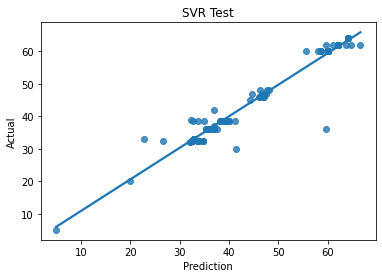

In [ ]:
test_pred = svm_reg.predict(X_test)
sns.regplot(test_pred,y_test,ci=None)
#plt.plot(test_pred,y_test)
plt.title("SVR Test")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

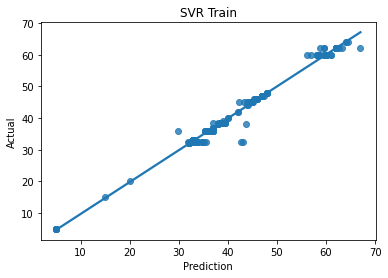

In [ ]:
test_pred = svm_reg.predict(X_train)
sns.regplot(test_pred,y_train,ci=None)
#plt.plot(test_pred,y_test)
plt.title("SVR Train")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

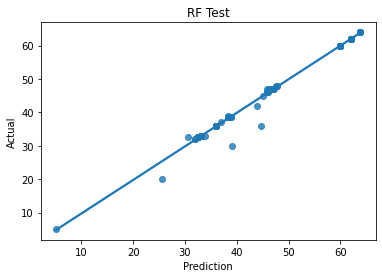

In [ ]:
test_pred = rf_reg.predict(X_test)
sns.regplot(test_pred,y_test,ci=None)
#plt.plot(test_pred,y_test)
plt.title("RF Test")
plt.xlabel('Prediction')
plt.ylabel('Actual')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Actual')

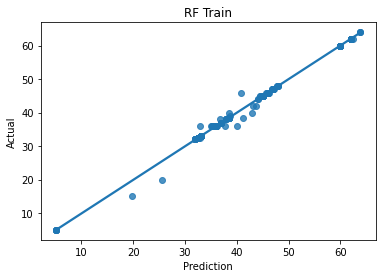

In [ ]:
test_pred = rf_reg.predict(X_train)
sns.regplot(test_pred,y_train,ci=None)
#plt.plot(test_pred,y_test)
plt.title("RF Train")
plt.xlabel('Prediction')
plt.ylabel('Actual')